In [1]:
# Libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data = pd.read_csv('../data/model-cleaned-players22.csv')

data['value_eur'] = np.log(data['value_eur'])


In [3]:
y = data['value_eur']
x = data['international_reputation']

In [4]:
x_trai, x_tes, y_trai, y_tes = train_test_split(
   x, y, test_size=0.2, random_state=0
)

x_train = np.reshape(x_trai.values, (-1, 1))
x_test = np.reshape(x_tes.values, (-1, 1))
y_train = np.reshape(y_trai.values, (-1, 1))
y_test = np.reshape(y_tes.values, (-1, 1))

In [5]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [6]:
y_pred_test = lr.predict(x_test)
y_pred_test

array([[13.81528697],
       [13.81528697],
       [13.81528697],
       ...,
       [13.81528697],
       [13.81528697],
       [13.81528697]])

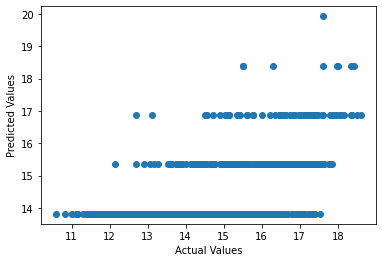

In [7]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [8]:
r2_score(y_test, y_pred_test)

0.24000190982739833

In [9]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

rmse

1.044435301600126

In [10]:
cross_val_score_test = cross_val_score(lr, x_test, y_test, scoring='r2', cv=10)

print(np.mean(cross_val_score_test))

0.2331971592937614


In [11]:
y_pred = cross_val_predict(lr, x_train, y_train, cv=10)
cross_val_rmse = np.sqrt(mean_squared_error(y_train, y_pred))

print('Cross-Validated rmse: ', cross_val_rmse)


Cross-Validated rmse:  1.0555025903014255
